In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from pathlib import Path
from datetime import date
from pprint import pprint
from io import BytesIO
from zipfile import ZipFile, BadZipFile
from tqdm import tqdm
import os
from datetime import datetime
import pandas_datareader.data as web
import mplfinance as mpf
import seaborn as sns
import json
import requests
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [6]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_companies = pd.read_html(sp_url, header=0)[0]

In [8]:
sp500_companies

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [2]:
import yaml
import nasdaqdatalink
import quandl
import yfinance as yf

with open('config.yaml', encoding='UTF-8') as f:
    _cfg = yaml.load(f, Loader=yaml.FullLoader)

QUANDL_API_KEY = _cfg['NASDAQ_API_KEY_SECRET']

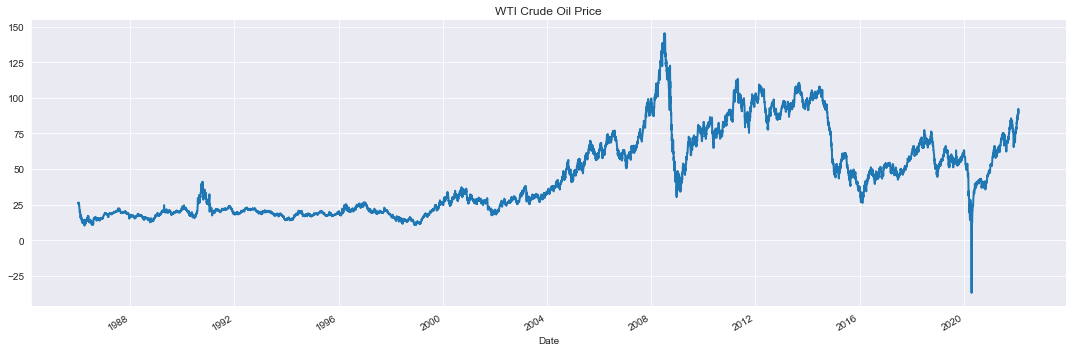

In [63]:
# data = quandl.get('FRED/GDP', start_date='2020-12-31', end_date='2023-12-31')
oil = quandl.get('EIA/PET_RWTC_D', api_key=QUANDL_API_KEY).squeeze()
oil.plot(lw=2, title='WTI Crude Oil Price', figsize=(15, 5))
sns.despine()
plt.tight_layout();

In [60]:
ticker = yf.Ticker('MSFT')
data = ticker.history(period='5d', interval='1m', actions=True, auto_adjust=True)
ticker.calendar

In [54]:
# get option price
options = ticker.option_chain(ticker.options[0])
options.puts # options.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT230331P00150000,2023-03-27 13:55:47+00:00,150.0,0.01,0.00,0.01,0.000000,0.000000,1.0,284,2.062505,False,REGULAR,USD
1,MSFT230331P00155000,2023-03-23 19:33:22+00:00,155.0,0.01,0.00,0.01,0.000000,0.000000,NaN,3,1.937500,False,REGULAR,USD
2,MSFT230331P00160000,2023-03-27 13:40:57+00:00,160.0,0.01,0.00,0.01,0.000000,0.000000,3.0,309,1.812501,False,REGULAR,USD
3,MSFT230331P00165000,2023-03-27 13:42:22+00:00,165.0,0.01,0.00,0.01,0.000000,0.000000,1.0,315,1.750001,False,REGULAR,USD
4,MSFT230331P00170000,2023-03-27 17:31:29+00:00,170.0,0.01,0.00,0.01,0.000000,0.000000,1.0,14,1.625002,False,REGULAR,USD
5,MSFT230331P00175000,2023-03-17 19:28:53+00:00,175.0,0.05,0.00,0.01,0.000000,0.000000,10.0,14,1.562502,False,REGULAR,USD
6,MSFT230331P00180000,2023-03-27 16:03:17+00:00,180.0,0.01,0.00,0.01,0.000000,0.000000,103.0,164,1.437503,False,REGULAR,USD
7,MSFT230331P00185000,2023-03-17 19:58:33+00:00,185.0,0.12,0.00,0.01,0.000000,0.000000,4.0,582,1.375003,False,REGULAR,USD
8,MSFT230331P00190000,2023-03-27 17:18:30+00:00,190.0,0.01,0.00,0.01,0.000000,0.000000,2.0,521,1.281254,False,REGULAR,USD
9,MSFT230331P00195000,2023-03-22 19:52:19+00:00,195.0,0.01,0.00,0.07,0.000000,0.000000,6.0,163,1.421878,False,REGULAR,USD


In [3]:
sns.set_style('whitegrid')

data_path = Path('data')
if not data_path.exists():
    data_path.mkdir()

In [4]:
SEC_URL = 'https://www.sec.gov/'
FSN_PATH = 'files/dera/data/financial-statement-and-notes-data-sets/'

In [5]:
filing_periods = [(d.year, d.quarter) for d in pd.date_range('2019', '2023-03-30', freq='Q')]
filing_periods

[(2019, 1),
 (2019, 2),
 (2019, 3),
 (2019, 4),
 (2020, 1),
 (2020, 2),
 (2020, 3),
 (2020, 4),
 (2021, 1),
 (2021, 2),
 (2021, 3),
 (2021, 4),
 (2022, 1),
 (2022, 2),
 (2022, 3),
 (2022, 4)]

In [6]:
for yr, qtr in tqdm(filing_periods):
    # set (and create) directory
    path = data_path / f'{yr}_{qtr}' / 'source'
    if not path.exists():
        path.mkdir(parents=True)

    # define url and get file
    filing = f'{yr}q{qtr}_notes.zip'
    url = SEC_URL + FSN_PATH + filing
    response = requests.get(url).content

    # decompress and save
    try:
        with ZipFile(BytesIO(response)) as zip_file:
            for file in zip_file.namelist():
                local_file = path / file
                if local_file.exists():
                    continue
                with local_file.open('wb') as output:
                    for line in zip_file.open(file).readlines():
                        output.write(line)
    except BadZipFile:
        print(f'\nBad zip file: {yr} {qtr}\n')
        continue

 56%|█████▋    | 9/16 [12:08<07:58, 68.31s/it]


Bad zip file: 2021 1



 62%|██████▎   | 10/16 [12:09<04:46, 47.69s/it]


Bad zip file: 2021 2



 69%|██████▉   | 11/16 [12:13<02:50, 34.04s/it]


Bad zip file: 2021 3



 75%|███████▌  | 12/16 [12:16<01:38, 24.66s/it]


Bad zip file: 2021 4



 81%|████████▏ | 13/16 [12:19<00:54, 18.09s/it]


Bad zip file: 2022 1



 88%|████████▊ | 14/16 [12:23<00:27, 13.76s/it]


Bad zip file: 2022 2



 94%|█████████▍| 15/16 [12:25<00:10, 10.40s/it]


Bad zip file: 2022 3



100%|██████████| 16/16 [12:28<00:00, 46.78s/it]


Bad zip file: 2022 4



In [7]:
for f in tqdm(sorted(list(data_path.glob('**/*.tsv')))):
    # set (and create) directory
    parquet_path = f.parent.parent / 'parquet'
    if not parquet_path.exists():
        parquet_path.mkdir(parents=True)

    # write content to .parquet
    file_name = f.stem  + '.parquet'
    if not (parquet_path / file_name).exists():
        try:
            df = pd.read_csv(f, sep='\t', encoding='utf-8', low_memory=False, error_bad_lines=False)
            df.to_parquet(parquet_path / file_name)
        except Exception as e:
            print(e, ' | ', f)
        # optional: uncomment to delete original .tsv
#         else:
            # f.unlink

 22%|██▏       | 14/64 [04:36<07:09,  8.60s/it]Skipping line 69252: expected 9 fields, saw 10
Skipping line 582206: expected 9 fields, saw 10
Skipping line 607590: expected 9 fields, saw 10

 34%|███▍      | 22/64 [06:01<06:52,  9.81s/it]Skipping line 374579: expected 9 fields, saw 10

 59%|█████▉    | 38/64 [09:46<04:52, 11.24s/it]Skipping line 754776: expected 9 fields, saw 10

 72%|███████▏  | 46/64 [11:01<02:07,  7.07s/it]Skipping line 530291: expected 9 fields, saw 10

 84%|████████▍ | 54/64 [12:47<01:42, 10.24s/it]Skipping line 602232: expected 9 fields, saw 10

100%|██████████| 64/64 [16:53<00:00, 15.83s/it]


In [95]:
# file = data_path / '2022_3' / 'source' / '2022q3_notes-metadata.json'
file = data_path / '2020_3' / 'source' / '2020q3_notes-metadata.json'
with file.open() as f:
    data = json.load(f)

pprint(data)

{'@context': 'http://www.w3.org/ns/csvw',
 'dialect': {'delimiter': '\t', 'header': True, 'headerRowCount': 1},
 'tables': [{'tableSchema': {'aboutUrl': 'readme.htm',
                             'columns': [{'datatype': {'base': 'string',
                                                       'maxLength': 20,
                                                       'minLength': 20},
                                          'dc:description': 'Accession Number. '
                                                            'The 20-character '
                                                            'string formed '
                                                            'from the 18-digit '
                                                            'number assigned '
                                                            'by the Commission '
                                                            'to each EDGAR '
                                                           

In [103]:
sub = pd.read_parquet(data_path / '2020_3' / 'parquet' / 'sub.parquet')
sub.columns

Index(['adsh', 'cik', 'name', 'sic', 'countryba', 'stprba', 'cityba', 'zipba',
       'bas1', 'bas2', 'baph', 'countryma', 'stprma', 'cityma', 'zipma',
       'mas1', 'mas2', 'countryinc', 'stprinc', 'ein', 'former', 'changed',
       'afs', 'wksi', 'fye', 'form', 'period', 'fy', 'fp', 'filed', 'accepted',
       'prevrpt', 'detail', 'instance', 'nciks', 'aciks', 'pubfloatusd',
       'floatdate', 'floataxis', 'floatmems'],
      dtype='object')

In [113]:
name = 'APPLE INC'
apple = sub[sub.name == name].T.dropna().squeeze()
key_cols = ['name', 'adsh', 'cik', 'name', 'sic', 'countryba', 'stprba', 'cityba', 'zipba', 'bas1', 'form', 'period','filed']
# apple.loc[key_cols]
apple.loc[key_cols]

name                    APPLE INC
adsh         0000320193-18-000007
cik                        320193
name                    APPLE INC
sic                        3571.0
countryba                      US
stprba                         CA
cityba                  CUPERTINO
zipba                       95014
bas1            ONE INFINITE LOOP
form                         10-Q
period                   20171231
filed                    20180202
Name: 610, dtype: object

In [114]:
aapl_subs = pd.DataFrame()
for sub in data_path.glob('**/sub.parquet'):
    sub = pd.read_parquet(sub)

    aapl_sub = sub[(sub.cik.astype(int) == apple.cik) & (sub.form.isin(['10-Q', '10-K']))]
    aapl_subs = pd.concat([aapl_subs, aapl_sub])

aapl_subs.form.value_counts()

10-Q    9
10-K    3
Name: form, dtype: int64

In [115]:
aapl_nums = pd.DataFrame()
for num in data_path.glob('**/num.parquet'):
    num = pd.read_parquet(num).drop('dimh', axis=1)
    aapl_num = num[num.adsh.isin(aapl_subs.adsh)]
    print(len(aapl_num))
    aapl_nums = pd.concat([aapl_nums, aapl_num])
aapl_nums.ddate = pd.to_datetime(aapl_nums.ddate, format='%Y%m%d')
aapl_nums.to_parquet(data_path / 'aapl_nums.parquet')

793
952
937
1224
755
1035
1039
1176
784
1017
1028
1223


In [118]:
aapl_nums.info()
aapl_nums

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11963 entries, 3243 to 3364728
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   adsh      11963 non-null  object        
 1   tag       11963 non-null  object        
 2   version   11963 non-null  object        
 3   ddate     11963 non-null  datetime64[ns]
 4   qtrs      11963 non-null  int64         
 5   uom       11963 non-null  object        
 6   iprx      11963 non-null  int64         
 7   value     11939 non-null  float64       
 8   footnote  0 non-null      object        
 9   footlen   11963 non-null  int64         
 10  dimn      11963 non-null  int64         
 11  coreg     0 non-null      object        
 12  durp      11963 non-null  float64       
 13  datp      11963 non-null  float64       
 14  dcml      11963 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(6)
memory usage: 1.5+ MB


,adsh,tag,version,ddate,qtrs,uom,iprx,value,footnote,footlen,dimn,coreg,durp,datp,dcml
3243,0000320193-18-000007,DerivativeNotionalAmount,invest/2013,2017-12-31,0,USD,0,4.833700e+10,None,0,2,None,0.000000,1.0,-6
3244,0000320193-18-000007,DerivativeNotionalAmount,invest/2013,2017-09-30,0,USD,0,5.615600e+10,None,0,2,None,0.000000,0.0,-6
3245,0000320193-18-000007,DerivativeNotionalAmount,invest/2013,2017-12-31,0,USD,0,7.705900e+10,None,0,2,None,0.000000,1.0,-6
3246,0000320193-18-000007,DerivativeNotionalAmount,invest/2013,2017-09-30,0,USD,0,6.977400e+10,None,0,2,None,0.000000,0.0,-6
3247,0000320193-18-000007,DerivativeNotionalAmount,invest/2013,2017-12-31,0,USD,0,3.525000e+10,None,0,2,None,0.000000,1.0,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364724,0000320193-20-000096,StockIssuedDuringPeriodSharesSharebasedPayment...,0000320193-20-000096,2020-09-30,4,shares,0,1.210880e+08,None,0,1,None,0.021918,4.0,-3
3364725,0000320193-20-000096,StockIssuedDuringPeriodSharesSharebasedPayment...,0000320193-20-000096,2019-09-30,4,shares,0,1.338210e+08,None,0,1,None,0.021918,2.0,-3
3364726,0000320193-20-000096,StockIssuedDuringPeriodSharesSharebasedPayment...,0000320193-20-000096,2018-09-30,4,shares,0,1.373360e+08,None,0,1,None,0.021918,1.0,-3
3364727,0000320193-20-000096,UpFrontPaymentUnderAcceleratedShareRepurchaseA...,0000320193-20-000096,2020-09-30,4,USD,0,1.000000e+10,None,0,1,None,0.021918,4.0,-8


TypeError: print_png() got an unexpected keyword argument 'dps'

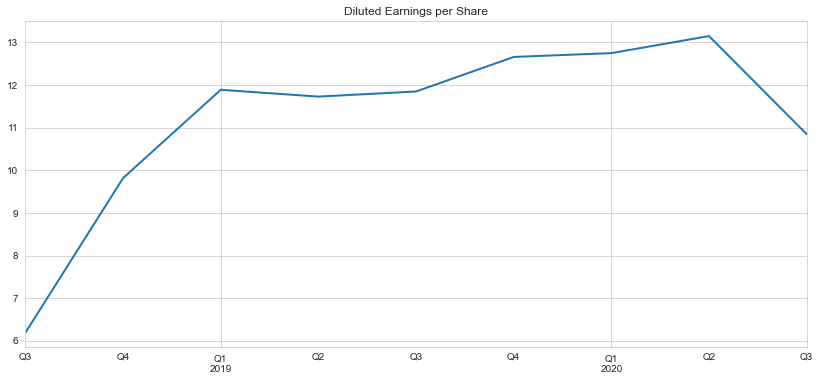

In [124]:
stock_split = 7
split_date = pd.to_datetime('20180604')

# Filter by tag; keep only values measuring 1 quarter
eps = aapl_nums[(aapl_nums.tag == 'EarningsPerShareDiluted')
                & (aapl_nums.qtrs == 1)].drop('tag', axis=1)

# Keep only most recent data point from each filing
eps = eps.groupby('adsh').apply(lambda x: x.nlargest(n=1, columns=['ddate']))

# Adjust earnings prior to stock split downward
eps.loc[eps.ddate < split_date,'value'] = eps.loc[eps.ddate < split_date, 'value'].div(7)
eps = eps[['ddate', 'value']].set_index('ddate').squeeze().sort_index()
eps = eps.rolling(4,min_periods=4).sum().dropna()
eps.plot(lw=2, figsize=(14, 6), title='Diluted Earnings per Share')
plt.xlabel('')
plt.savefig('diluted eps', dps=300);